In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# Load CSV files
train_data = pd.read_csv('/content/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
# Extraction of features and labels
X_train = train_data.drop('label', axis=1).astype('float32')
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).astype('float32')
y_test = test_data['label'].values

In [ ]:
# Assuming the last column is the label
X_train = train_data.iloc[:, :-1] / 255.0  # Normalize the data
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1] / 255.0  # Normalize the data
y_test = test_data.iloc[:, -1]

In [ ]:
print('Train: ', train_data.shape)
print('Test: ', test_data.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [ ]:
# Separate features and labels
X = train_data.drop('label', axis=1)
y = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize a dictionary to store model accuracies
model_accuracies = {}

Training time 119.72500276565552
Testing time 0.36340999603271484


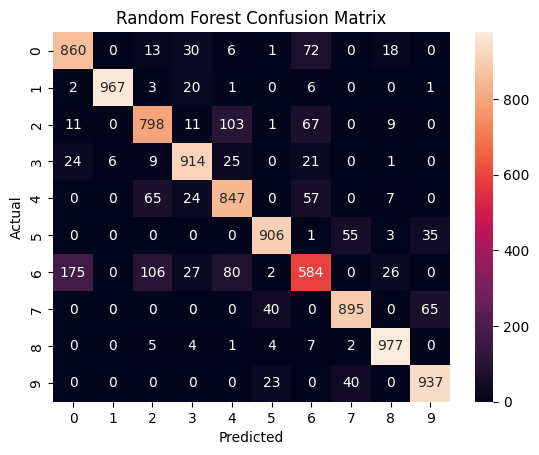

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.8685


In [ ]:

from sklearn.ensemble import RandomForestClassifier
import time
# Training the Random Forest model
rf_model = RandomForestClassifier()
start_time = time.time()
rf_model.fit(X_train_pca, y_train)
end_time = time.time()
print('Training time', end_time - start_time)

# Predicting and calculating the accuracy
y_pred_train_rf = rf_model.predict(X_train_pca)
start_time = time.time()
y_pred_test_rf = rf_model.predict(X_test_pca)
end_time = time.time()
print('Testing time', end_time - start_time)


accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
model_accuracies['Random Forest'] = (accuracy_train_rf, accuracy_test_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f'Random Forest Training Accuracy: {accuracy_train_rf}')
print(f'Random Forest Testing Accuracy: {accuracy_test_rf}')

Training time 103.24334359169006
Testing time 0.2503664493560791


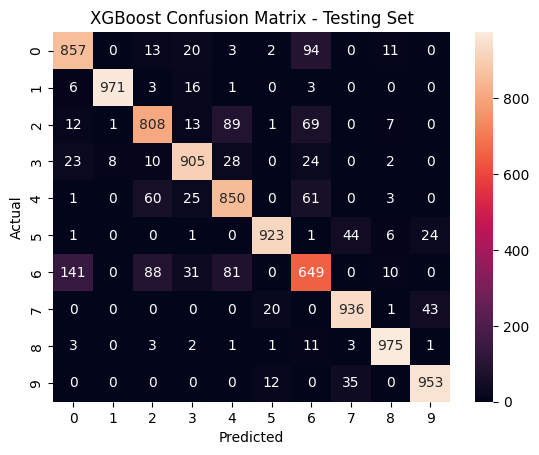

XGBoost Training Accuracy: 0.9975
XGBoost Testing Accuracy: 0.8827


In [ ]:
from xgboost import XGBClassifier

# Training the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
start_time = time.time()
xgb_model.fit(X_train_pca, y_train)
end_time = time.time()
print('Training time', end_time - start_time)

# Predicting and calculate accuracy
y_pred_train_xgb = xgb_model.predict(X_train_pca)
start_time = time.time()
y_pred_test_xgb = xgb_model.predict(X_test_pca)
end_time = time.time()
print('Testing time', end_time - start_time)

accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
model_accuracies['XGBoost'] = (accuracy_train_xgb, accuracy_test_xgb)

# Confusion Matrix for XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix - Testing Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f'XGBoost Training Accuracy: {accuracy_train_xgb}')
print(f'XGBoost Testing Accuracy: {accuracy_test_xgb}')

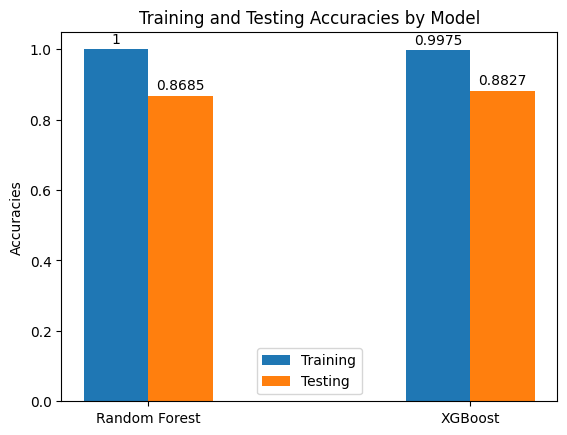

In [ ]:
# Preparing data for bar chart
labels = list(model_accuracies.keys())
training_accuracies = [acc[0] for acc in model_accuracies.values()]
testing_accuracies = [acc[1] for acc in model_accuracies.values()]

x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_accuracies, width, label='Training')
rects2 = ax.bar(x + width/2, testing_accuracies, width, label='Testing')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracies')
ax.set_title('Training and Testing Accuracies by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

plt.show()

Training time 119.6220314502716
Testing time 0.3419034481048584


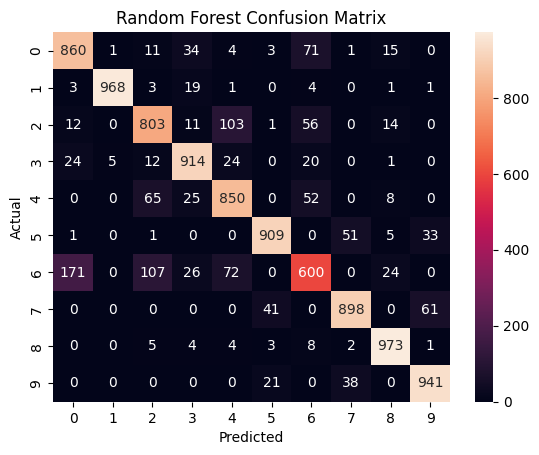

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.8716
Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Random Forest Testing Classification Report:
              precision    recall  f1-score   support

           0       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Training the Random Forest model
rf_model = RandomForestClassifier()
start_time = time.time()
rf_model.fit(X_train_pca, y_train)
end_time = time.time()
print('Training time', end_time - start_time)

# Predicting and calculating the accuracy
y_pred_train_rf = rf_model.predict(X_train_pca)
start_time = time.time()
y_pred_test_rf = rf_model.predict(X_test_pca)
end_time = time.time()
print('Testing time', end_time - start_time)

# Calculating accuracies
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
model_accuracies['Random Forest'] = (accuracy_train_rf, accuracy_test_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Displaying the results
print(f'Random Forest Training Accuracy: {accuracy_train_rf}')
print(f'Random Forest Testing Accuracy: {accuracy_test_rf}')

# Classification Report
print("Random Forest Training Classification Report:")
print(classification_report(y_train, y_pred_train_rf))

print("Random Forest Testing Classification Report:")
print(classification_report(y_test, y_pred_test_rf))


Training time 73.07642912864685
Testing time 0.28121471405029297


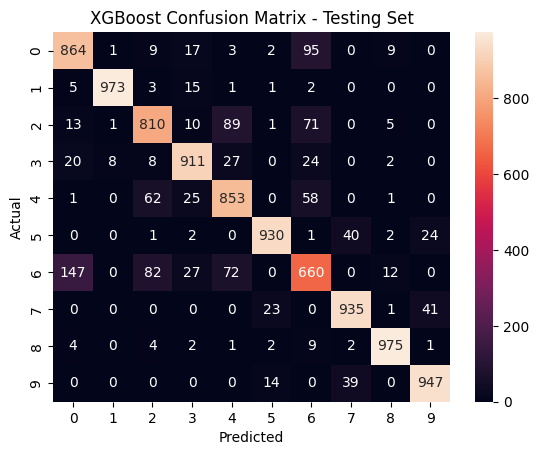

XGBoost Training Accuracy: 0.9975666666666667
XGBoost Testing Accuracy: 0.8858
XGBoost Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      0.99      0.99      6000
           3       1.00      1.00      1.00      6000
           4       0.99      0.99      0.99      6000
           5       1.00      1.00      1.00      6000
           6       0.99      0.99      0.99      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

XGBoost Testing Classification Report:
              precision    recall  f1-score   support

           0       0.82     

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Training the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
start_time = time.time()
xgb_model.fit(X_train_pca, y_train)
end_time = time.time()
print('Training time', end_time - start_time)

# Predicting and calculating accuracy
y_pred_train_xgb = xgb_model.predict(X_train_pca)
start_time = time.time()
y_pred_test_xgb = xgb_model.predict(X_test_pca)
end_time = time.time()
print('Testing time', end_time - start_time)

# Calculating accuracies
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
model_accuracies['XGBoost'] = (accuracy_train_xgb, accuracy_test_xgb)

# Confusion Matrix for XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix - Testing Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Displaying the results
print(f'XGBoost Training Accuracy: {accuracy_train_xgb}')
print(f'XGBoost Testing Accuracy: {accuracy_test_xgb}')

# Classification Report
print("XGBoost Training Classification Report:")
print(classification_report(y_train, y_pred_train_xgb))

print("XGBoost Testing Classification Report:")
print(classification_report(y_test, y_pred_test_xgb))
